# STA/LTA algorithm implementation

## Make a graphical chart of the whole sequence of data, with the 3 axes shown separately.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('AZ.PFO.txt', sep='\t', comment = '#', names=['t', 'east', 'north', 'up'])

In [3]:
df.head()

,t,east,north,up
0,0.00,2836,827,-137
1,0.01,2846,815,-178
2,0.02,2811,784,-200
3,0.03,2793,800,-174
4,0.04,2819,822,-133


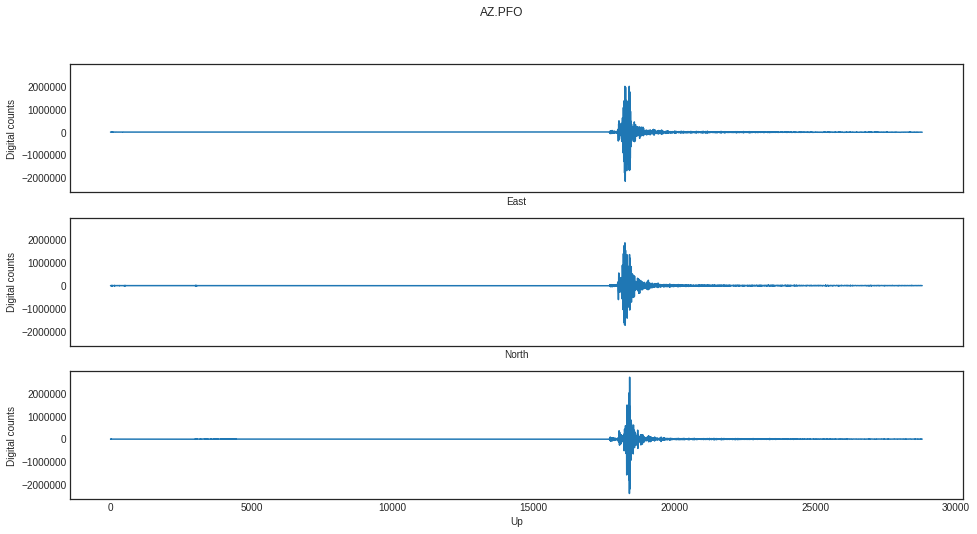

In [4]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(16,8))
fig.suptitle('AZ.PFO')

axs[0].plot(df.t, df.east, label='East')
axs[1].plot(df.t, df.north, label='North')
axs[2].plot(df.t, df.up, label='Up');

axs[0].set(xlabel="East",ylabel="Digital counts")
axs[1].set(xlabel="North",ylabel="Digital counts")
axs[2].set(xlabel="Up",ylabel="Digital counts");

## By plotting shorter time intervals, separate and show graphically each of the seismic events that can be detected by simple observation.

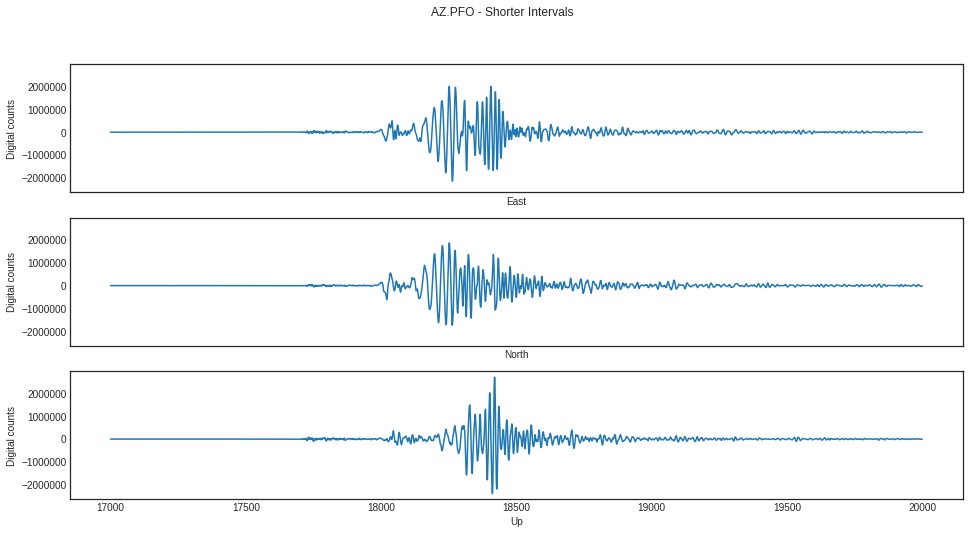

In [5]:
df_sub = df[(df.t > 17000) & (df.t < 20000)]

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(16,8))
fig.suptitle('AZ.PFO - Shorter Intervals')

axs[0].plot(df_sub.t, df_sub.east, label='East')
axs[1].plot(df_sub.t, df_sub.north, label='North')
axs[2].plot(df_sub.t, df_sub.up, label='Up');

axs[0].set(xlabel="East",ylabel="Digital counts")
axs[1].set(xlabel="North",ylabel="Digital counts")
axs[2].set(xlabel="Up",ylabel="Digital counts");

## Create a new dataset by applying the STA/LTA algorithm (explained below) to the time series dataset from the AZ.PFO.txt file.

STA/LTA ALGORITHM
This is a common seismology trigger algorithm and is based on analysis of moving windows.
Pseudocode:
At the start of the data sequence, take the first 10 seconds of data for each axis and take the average of the absolute values. Next, take the final 1 second of data from this same 10s window and again take an average reading of the absolute values for each axis.

The average value taken from the 1s window should be divided by the value for the 10s window. This resulting value should be shown graphically for each axis.

Then, move 0.5 seconds to the right and do the calculations again. That is to say, we are now doing the 1 second average for 9.5 to 10.5 seconds, and the 10s average using 0.5s to 10.5s. This is incrementally repeated until finishing the data sequence.

In [6]:
dfa = df[1:].copy()
dfa.east = dfa.east.abs()
dfa.north = dfa.north.abs()
dfa.up = dfa.up.abs()

big_dfa = dfa.rolling(1000)[['up', 'north', 'east']].mean()
bigdfa = big_dfa[999:].copy()
res_bigdfa = bigdfa[bigdfa.index % 50 == 0].copy()

little_dfa = dfa.rolling(100)[['up', 'north', 'east']].mean()
littledfa = little_dfa[999:].copy()
res_littledfa = littledfa[littledfa.index % 50 == 0].copy()

In [7]:
data = {'UP':res_littledfa.up/res_bigdfa.up, 'NORTH':res_littledfa.north/res_bigdfa.north, 'EAST':res_littledfa.east/res_bigdfa.east} 
result = pd.DataFrame(data, index =res_bigdfa.index) 
result.head()

,UP,NORTH,EAST
1000,1.191535,0.776165,1.018545
1050,1.496983,0.701497,1.010016
1100,1.659387,0.705217,0.994399
1150,1.615316,0.812059,0.978279
1200,1.391275,0.952599,0.975957


## Visualize the STA/LTA values and also the relationship between STA and LTA.

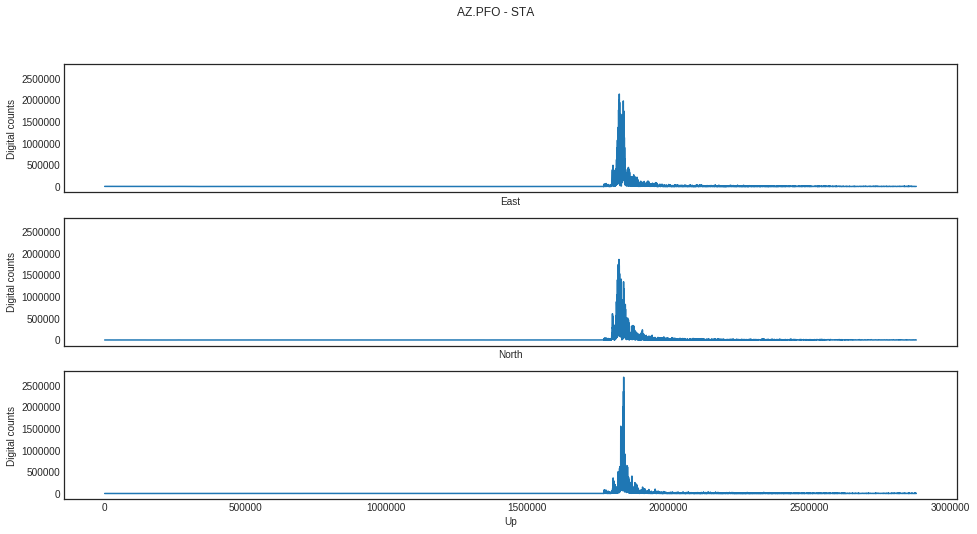

In [8]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(16,8))
fig.suptitle('AZ.PFO - STA')

axs[0].plot(res_littledfa.east, label='East')
axs[1].plot(res_littledfa.north, label='North')
axs[2].plot(res_littledfa.up, label='Up');

axs[0].set(xlabel="East",ylabel="Digital counts")
axs[1].set(xlabel="North",ylabel="Digital counts")
axs[2].set(xlabel="Up",ylabel="Digital counts");

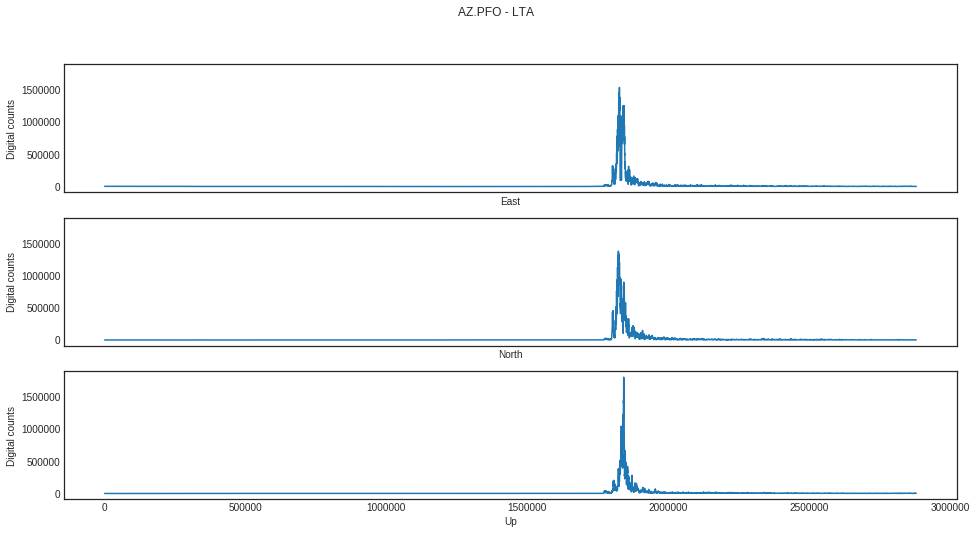

In [9]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(16,8))
fig.suptitle('AZ.PFO - LTA')

axs[0].plot(res_bigdfa.east, label='East')
axs[1].plot(res_bigdfa.north, label='North')
axs[2].plot(res_bigdfa.up, label='Up');

axs[0].set(xlabel="East",ylabel="Digital counts")
axs[1].set(xlabel="North",ylabel="Digital counts")
axs[2].set(xlabel="Up",ylabel="Digital counts");

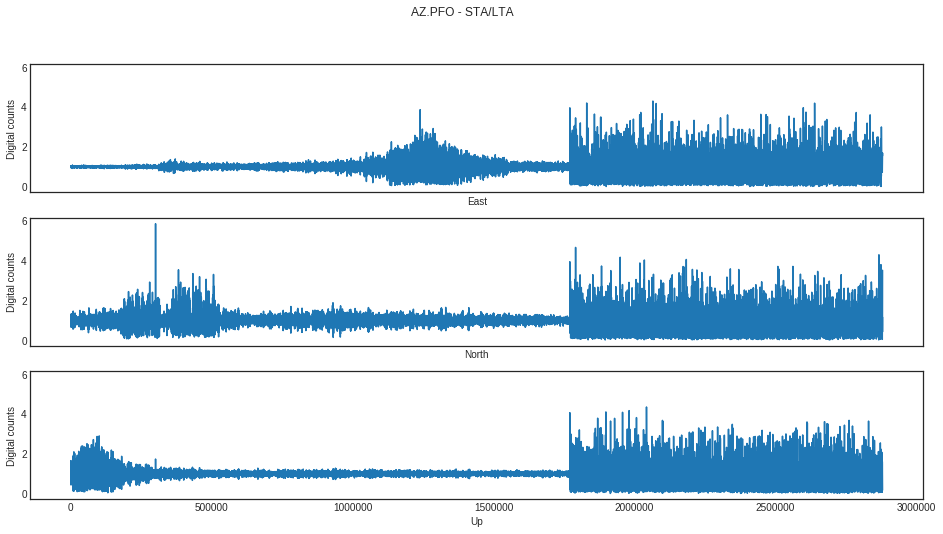

In [10]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(16,8))
fig.suptitle('AZ.PFO - STA/LTA')

axs[0].plot(result.index, result.EAST, label='East')
axs[1].plot(result.index, result.NORTH, label='North')
axs[2].plot(result.index, result.UP, label='Up');

axs[0].set(xlabel="East",ylabel="Digital counts")
axs[1].set(xlabel="North",ylabel="Digital counts")
axs[2].set(xlabel="Up",ylabel="Digital counts");

## Specify in a list the start time for each seismic event that you are able to detect.

Four seismic events appear in the data. 

1.- UP - 2017-09-08T00:00:10 <BR>
2.- NORTH - 2017-09-08T00:35:00 <BR>
3.- EAST - 2017-09-08T03:07:30 <BR>
4.- ALL VARIABLES - 2017-09-08T04:49:50 <BR>


In [11]:
# To obtain the previous dates
import datetime
from datetime import timedelta

In [12]:
orig = datetime.datetime(2017, 9, 8)
seismic_event = [orig, orig + timedelta(seconds = 1500),orig + timedelta(seconds = 11250), orig + timedelta(seconds = 35390)]
seismic_event

[datetime.datetime(2017, 9, 8, 0, 0),
 datetime.datetime(2017, 9, 8, 0, 25),
 datetime.datetime(2017, 9, 8, 3, 7, 30),
 datetime.datetime(2017, 9, 8, 9, 49, 50)]

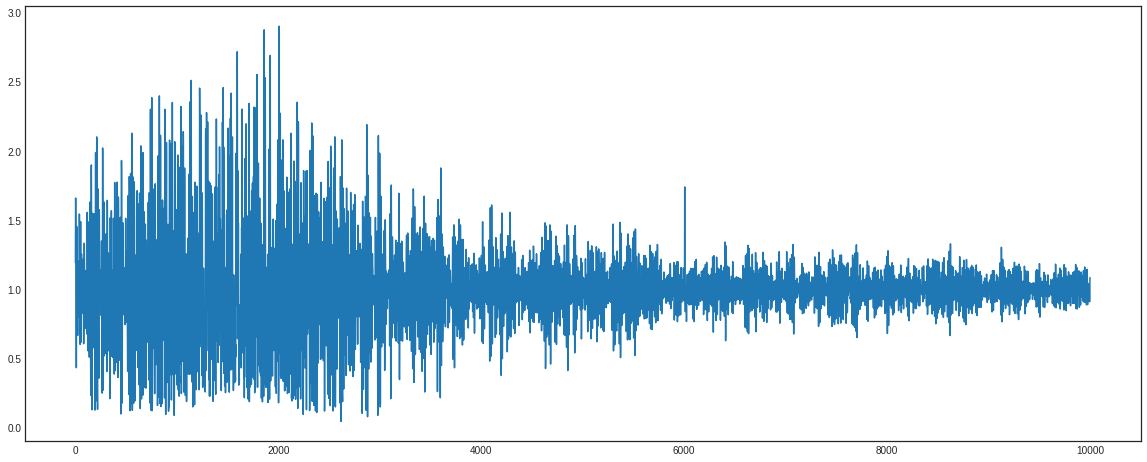

In [13]:
# Zoom of variable UP
plt.figure(figsize=(20,8))
aux = result.copy()
aux.reset_index(inplace = True, drop = True)
plt.plot(aux.UP[0:10000])

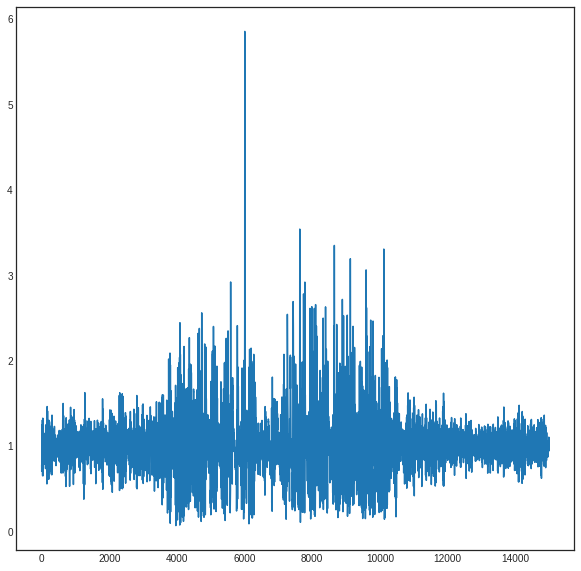

In [14]:
# Zoom of variable NORTH
plt.figure(figsize=(10,10))
plt.plot(aux.NORTH[:15000])

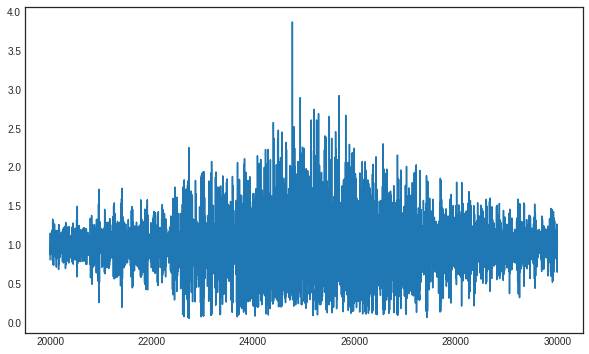

In [15]:
# Zoom of variable EAST
plt.figure(figsize=(10,6))
plt.plot(aux.EAST[20000:30000])